# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [16]:
#Importando a base e entendo a distribuição de dados
base = pd.read_csv('housing.csv', sep=',')
print('Total de Registros ' + str(len(base)))
base.head(8)

Total de Registros 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [17]:
#Verificando se há dados nulos na base
base.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
#Criando uma nova base sem os registros nulos
base.dropna(subset="total_bedrooms", inplace=True)
len(base)

20433

In [19]:
#Verificando os tipos de cada coluna
base.dtypes
#Excluindo coluna não numérica
base_2 = base.drop(columns ='ocean_proximity')
base_2.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Base tratada para um formato adequado para o scikitlearn

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [20]:
base_2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

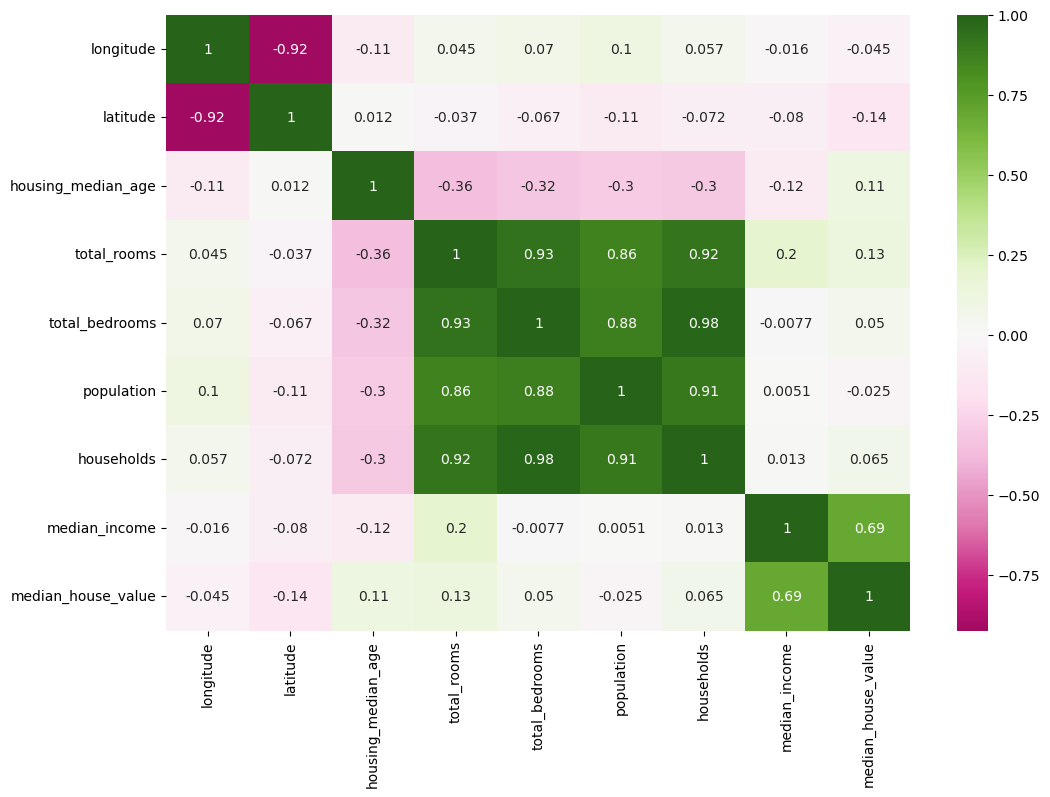

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data=base_2.corr(), center=0, annot=True, cmap='PiYG')

* Temos apenas a váriavel 'median_income' que nos traz alguma boa correlação entre o valor médio dos imóveis

### 3. Separe os dados em validação e teste

In [22]:
X = base.drop(columns=['median_house_value','ocean_proximity'])
len(X)

20433

In [23]:
y = base.loc[:,'median_house_value']
len(y)

20433

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=232)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

15324
15324
5109
5109


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [25]:
tree1 = DecisionTreeRegressor(max_depth=8)
tree2 = DecisionTreeRegressor(max_depth=2)

tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

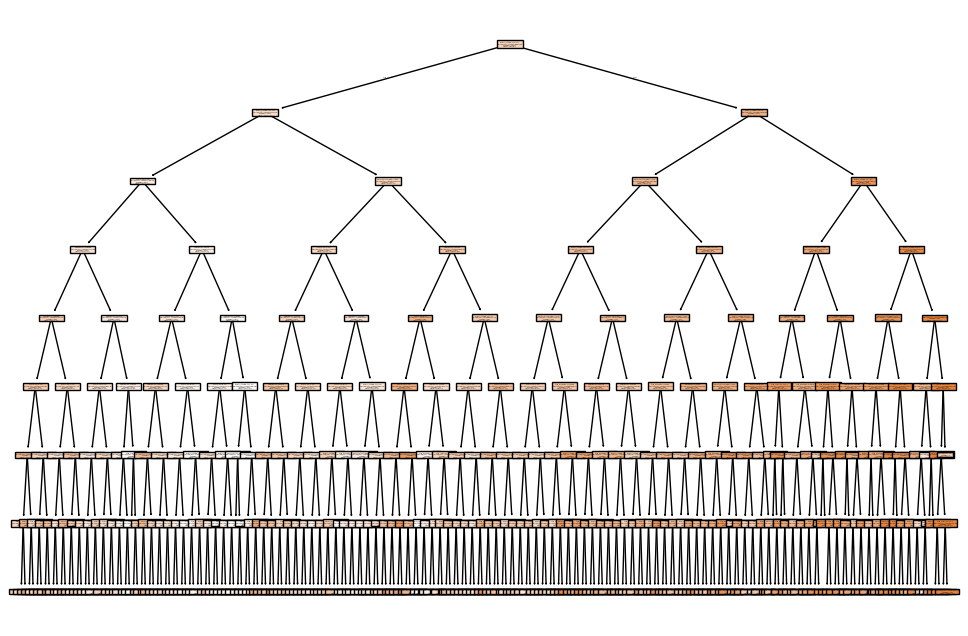

In [26]:
plt.figure(figsize=(12,8))
tp = tree.plot_tree(tree1, 
                    feature_names=X.columns,  
                    filled=True) 

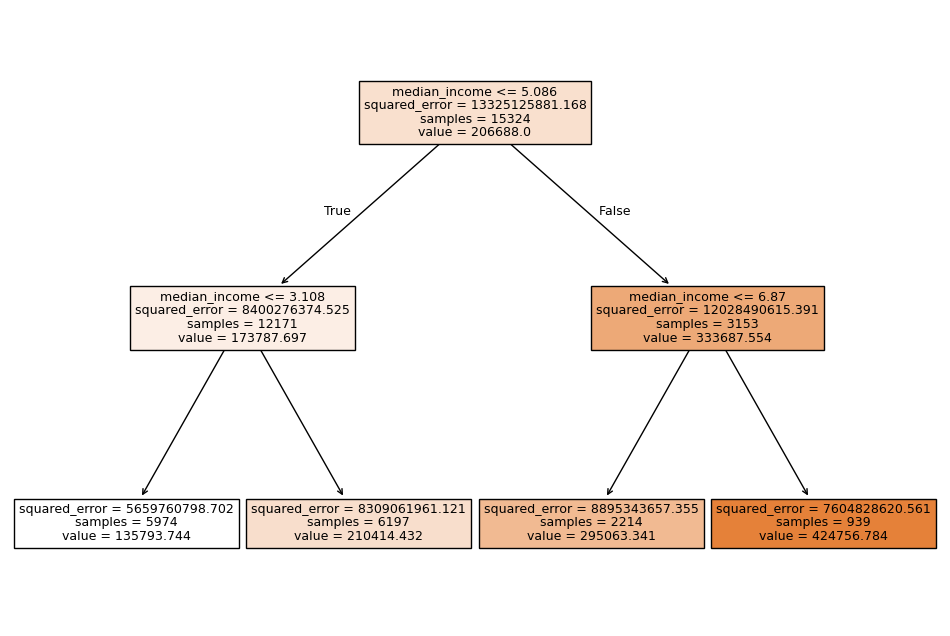

In [27]:
plt.figure(figsize=(12,8))
tp = tree.plot_tree(tree2, 
                    feature_names=X.columns,  
                    filled=True) 

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [29]:
mse1 = tree1.score(X_train, y_train)
mse2 = tree2.score(X_train, y_train)

mse1

0.7549876889502616

In [30]:
y_pred_train_tree1 = tree1.predict(X_train)
y_pred_test_tree1 = tree1.predict(X_test)

y_pred_train_tree2 = tree2.predict(X_train)
y_pred_test_tree2 = tree2.predict(X_test)

# Cálculo do MSE para cada árvore
mse_train_tree1 = mean_squared_error(y_train, y_pred_train_tree1)
mse_test_tree1 = mean_squared_error(y_test, y_pred_test_tree1)

mse_train_tree2 = mean_squared_error(y_train, y_pred_train_tree2)
mse_test_tree2 = mean_squared_error(y_test, y_pred_test_tree2)

# Template para exibir os resultados
template = "O MSE da árvore com profundidade={0} na {1} é: {2:.2f}"

# Resultados para tree1
print(template.format(tree1.get_depth(), "base de treinamento", mse_train_tree1).replace(".", ","))
print(template.format(tree1.get_depth(), "base de testes", mse_test_tree1).replace(".", ","))

# Resultados para tree2
print(template.format(tree2.get_depth(), "base de treinamento", mse_train_tree2).replace(".", ","))
print(template.format(tree2.get_depth(), "base de testes", mse_test_tree2).replace(".", ","))


O MSE da árvore com profundidade=8 na base de treinamento é: 3264819887,17
O MSE da árvore com profundidade=8 na base de testes é: 4030262833,50
O MSE da árvore com profundidade=2 na base de treinamento é: 7317795152,48
O MSE da árvore com profundidade=2 na base de testes é: 7527294959,63


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Conforme o MSE da árvore de profundidade 8, podemos verificar que o menor erro quadrático médio, esta neste modelo, sendo assim, é o modelo mais adequado para utilizar na previsão

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

A árvore esta plotada acima, e sobre a variável que mais me parece importante, é a median_income, que é a mesma que identificamos na matriz de correlações, penso nisso pois é a variavel utilizada como quebra para as folhas